The ATP men’s tennis dataset includes a wide array of tennis statistics, which are described below:

## Identifying Data
Player: name of the tennis player
Year: year data was recorded
## Service Game Columns (Offensive)
- Aces: number of serves by the player where the receiver does not touch the ball
- DoubleFaults: number of times player missed both first and second serve attempts
- FirstServe: % of first-serve attempts made
- FirstServePointsWon: % of first-serve attempt points won by the player
- SecondServePointsWon: % of second-serve attempt points won by the player
- BreakPointsFaced: number of times where the receiver could have won service game of the player
- BreakPointsSaved: % of the time the player was able to stop the receiver from winning service game when they had the chance
- ServiceGamesPlayed: total number of games where the player served
- ServiceGamesWon: total number of games where the player served and won
- TotalServicePointsWon: % of points in games where the player served that they won
## Return Game Columns (Defensive)
- FirstServeReturnPointsWon: % of opponents first-serve points the player was able to win
- SecondServeReturnPointsWon: % of opponents second-serve points the player was able to win
- BreakPointsOpportunities: number of times where the player could have won the service game of the opponent
- BreakPointsConverted: % of the time the player was able to win their opponent’s service game when they had the chance
- ReturnGamesPlayed: total number of games where the player’s opponent served
- ReturnGamesWon: total number of games where the player’s opponent served and the player won
- ReturnPointsWon: total number of points where the player’s opponent served and the player won
- TotalPointsWon: % of points won by the player
## Outcomes
- Wins: number of matches won in a year
- Losses: number of matches lost in a year
- Winnings: total winnings in USD($) in a year
- Ranking: ranking at the end of year

In [4]:
# import codecademylib3_seaborn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

C:\Users\msala\AppData\Local\Temp\ipykernel_27196\2003870452.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
df = pd.read_csv("tennis_stats.csv")
df.head()

Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2                  0.38                10   
3                        0.33     2                  0.33                 5   
4                        0.33     1                  0.00                 2   

   ...  ReturnGamesWon  ReturnPointsWon  ServiceGamesPlayed  ServiceGamesWon  \
0  ...            0.11             0.38                   8             0.50   
1  ...            0.00             0.20                   9             0.67   
2  ...            0.16             0.34                  17             0.65   
3  ...            0.14             0.34                  15             0.80   
4  ...            0.00             0.20                   2             0.50   

   TotalPointsWon  TotalServicePointsWon  Wins  Losses  Winnings  Ranking  
0            0.43                   0.50     1       2     39820      119  
1            0.41                   0.57     0       1     17334      381  
2            0.45                   0.59     4       1    109827      119  
3            0.49                   0.63     0       0      9761      125  
4            0.35                   0.50     0       1     32879      272  

[5 rows x 24 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

In [21]:
df.Year.value_counts()

Year
2017    261
2016    250
2015    227
2014    210
2013    197
2012    167
2011    159
2010    140
2009    110
Name: count, dtype: int64

In [7]:
df.describe().T

count           mean            std      min  \
Year                        1721.0    2013.646717       2.488018  2009.00   
FirstServe                  1721.0       0.598053       0.054533     0.36   
FirstServePointsWon         1721.0       0.680738       0.070422     0.27   
FirstServeReturnPointsWon   1721.0       0.261673       0.056639     0.00   
SecondServePointsWon        1721.0       0.479733       0.066902     0.06   
SecondServeReturnPointsWon  1721.0       0.466432       0.068447     0.00   
Aces                        1721.0      97.105171     137.966077     0.00   
BreakPointsConverted        1721.0       0.369407       0.162987     0.00   
BreakPointsFaced            1721.0     112.003486     119.247651     1.00   
BreakPointsOpportunities    1721.0     102.918071     122.761670     0.00   
BreakPointsSaved            1721.0       0.565386       0.119426     0.00   
DoubleFaults                1721.0      49.112144      56.630264     0.00   
ReturnGamesPlayed           1721.0     198.307960     221.296070     0.00   
ReturnGamesWon              1721.0       0.173823       0.080880     0.00   
ReturnPointsWon             1721.0       0.342208       0.049369     0.00   
ServiceGamesPlayed          1721.0     197.650203     221.208703     0.00   
ServiceGamesWon             1721.0       0.715590       0.123287     0.00   
TotalPointsWon              1721.0       0.473155       0.037139     0.22   
TotalServicePointsWon       1721.0       0.599245       0.057718     0.25   
Wins                        1721.0       7.876816      10.183716     0.00   
Losses                      1721.0       9.278908       8.996450     0.00   
Winnings                    1721.0  234492.757118  253053.693697   108.00   
Ranking                     1721.0     269.610691     277.341947     3.00   

                                 25%        50%        75%         max  
Year                         2012.00    2014.00    2016.00     2017.00  
FirstServe                      0.57       0.60       0.63        0.88  
FirstServePointsWon             0.65       0.69       0.72        0.89  
FirstServeReturnPointsWon       0.24       0.27       0.29        0.48  
SecondServePointsWon            0.46       0.49       0.52        0.92  
SecondServeReturnPointsWon      0.44       0.48       0.50        0.75  
Aces                            7.00      34.00     140.00     1185.00  
BreakPointsConverted            0.32       0.38       0.43        1.00  
BreakPointsFaced               15.00      55.00     201.00      507.00  
BreakPointsOpportunities        9.00      41.00     172.00      573.00  
BreakPointsSaved                0.52       0.59       0.63        1.00  
DoubleFaults                    6.00      23.00      80.00      309.00  
ReturnGamesPlayed              22.00      86.00     349.00      910.00  
ReturnGamesWon                  0.13       0.18       0.22        0.56  
ReturnPointsWon                 0.32       0.35       0.37        0.51  
ServiceGamesPlayed             22.00      86.00     348.00      916.00  
ServiceGamesWon                 0.67       0.75       0.79        1.00  
TotalPointsWon                  0.46       0.48       0.50        0.82  
TotalServicePointsWon           0.57       0.61       0.63        0.82  
Wins                            0.00       3.00      13.00       48.00  
Losses                          2.00       5.00      17.00       36.00  
Winnings                    49311.00  125212.00  350075.00  1074562.00  
Ranking                        83.00     166.00     333.00     1443.00

## Exploratory Data Analysis

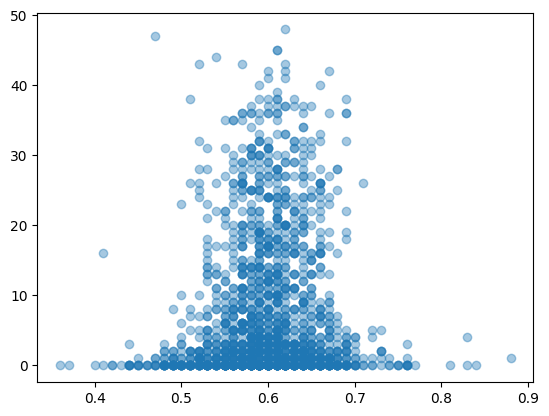

In [8]:
plt.scatter(df[['FirstServe']], df[['Wins']], alpha = 0.4)
plt.show()

First Serves vs wins seems to be positively correlated but does not show a strong correlation.

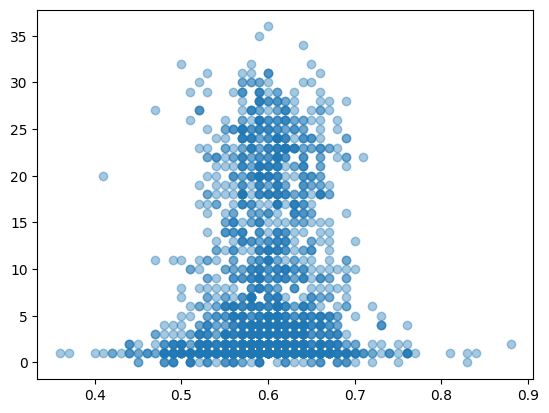

In [10]:
plt.scatter(df[['FirstServe']], df[['Losses']], alpha = 0.4)
plt.show()

Losses seems to have the same distribution as the wins. however the scale can be considered smaller

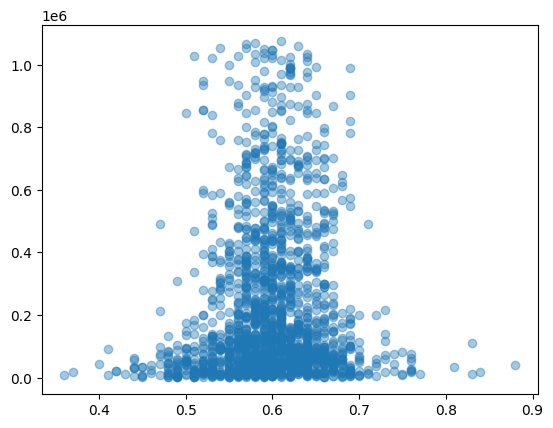

In [11]:
plt.scatter(df[['FirstServe']], df[['Winnings']], alpha = 0.4)
plt.show()

Winnings again shows the same kind of distribution as the first two. And no strong correlation

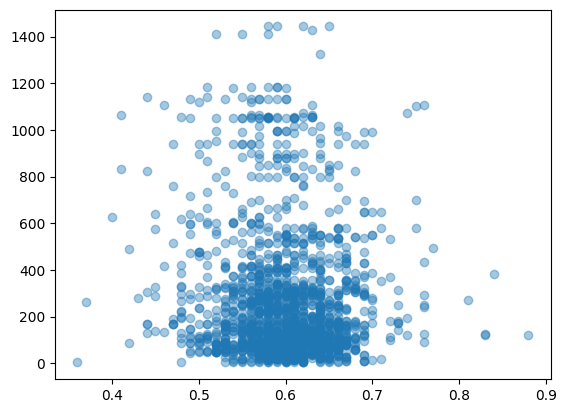

In [12]:
plt.scatter(df[['FirstServe']], df[['Ranking']], alpha = 0.4)
plt.show()

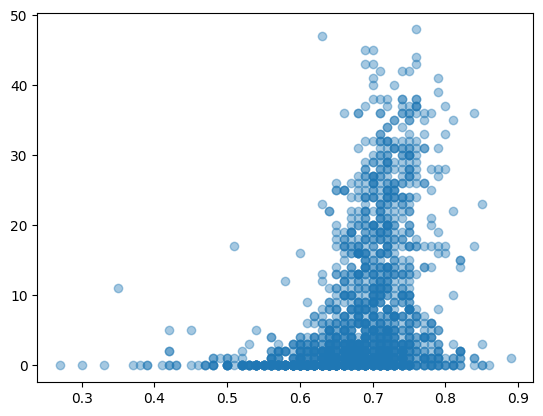

In [13]:
plt.scatter(df[['FirstServePointsWon']], df[['Wins']], alpha = 0.4)
plt.show()

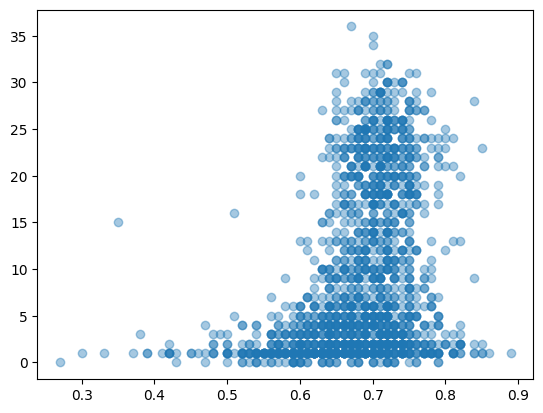

In [14]:
plt.scatter(df[['FirstServePointsWon']], df[['Losses']], alpha = 0.4)
plt.show()

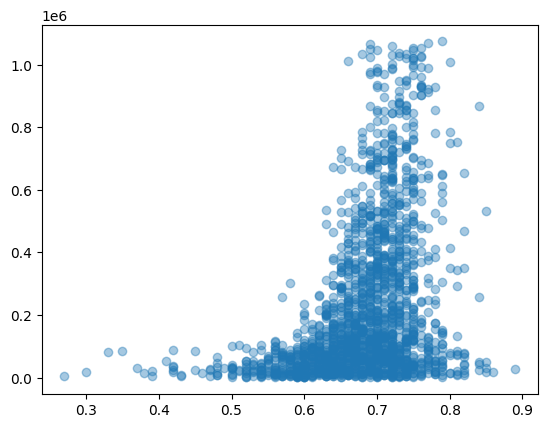

In [15]:
plt.scatter(df[['FirstServePointsWon']], df[['Winnings']], alpha = 0.4)
plt.show()

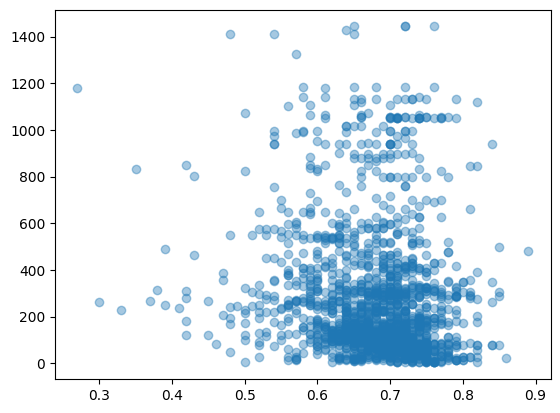

In [16]:
plt.scatter(df[['FirstServePointsWon']], df[['Ranking']], alpha = 0.4)
plt.show()

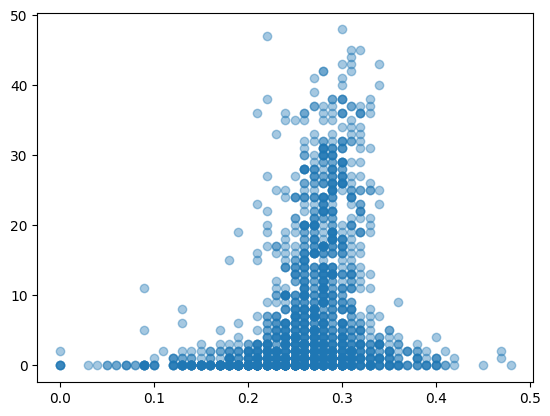

In [17]:
plt.scatter(df[['FirstServeReturnPointsWon']], df[['Wins']], alpha = 0.4)
plt.show()

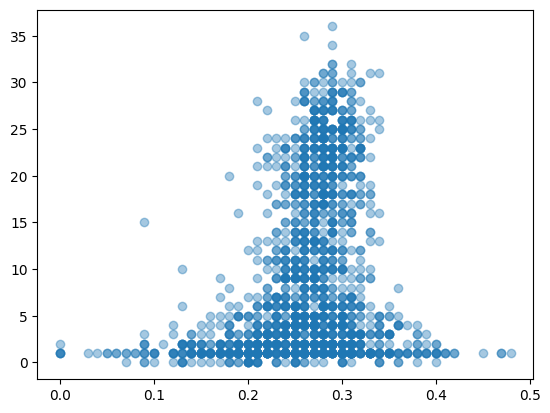

In [18]:
plt.scatter(df[['FirstServeReturnPointsWon']], df[['Losses']], alpha = 0.4)
plt.show()

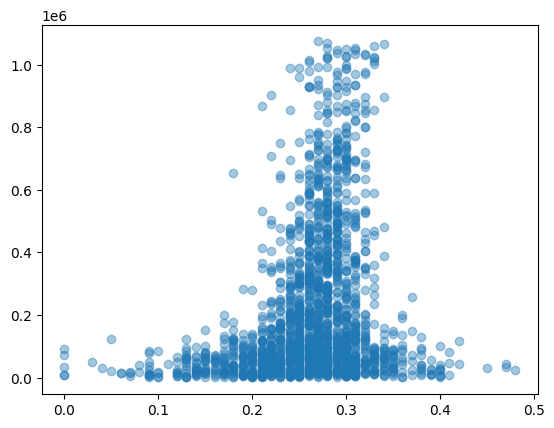

In [19]:
plt.scatter(df[['FirstServeReturnPointsWon']], df[['Winnings']], alpha = 0.4)
plt.show()

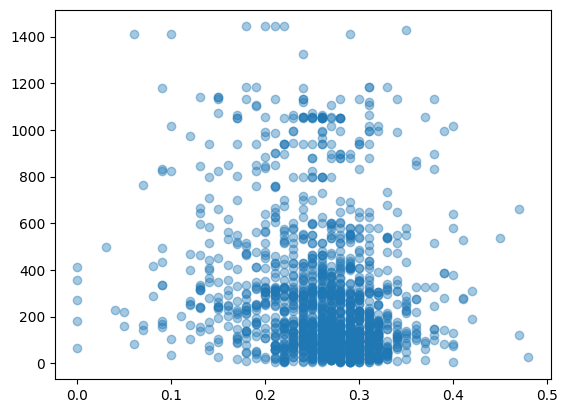

In [20]:
plt.scatter(df[['FirstServeReturnPointsWon']], df[['Ranking']], alpha = 0.4)
plt.show()

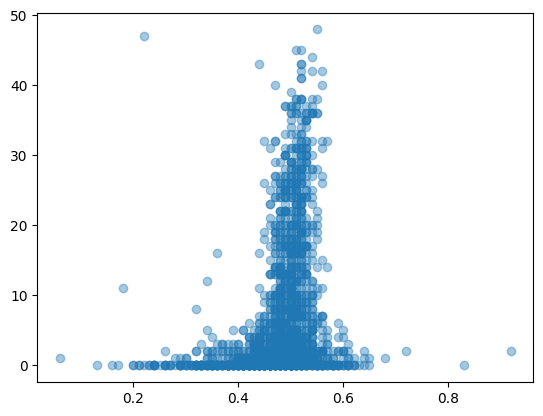

In [22]:
plt.scatter(df[['SecondServePointsWon']], df[['Wins']], alpha = 0.4)
plt.show()

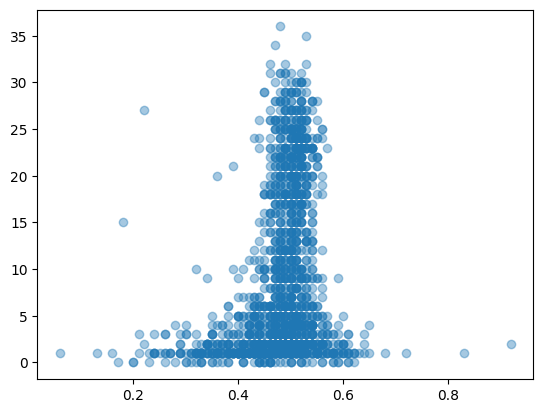

In [23]:
plt.scatter(df[['SecondServePointsWon']], df[['Losses']], alpha = 0.4)
plt.show()

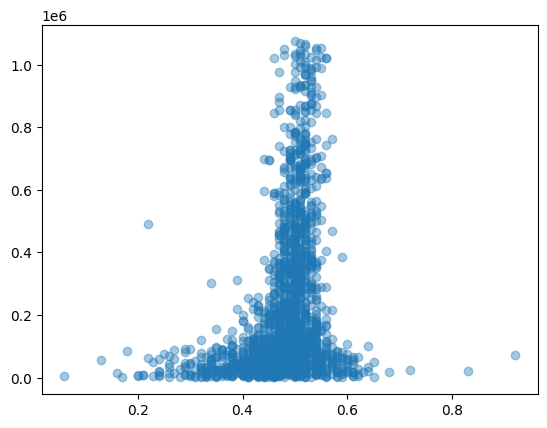

In [24]:
plt.scatter(df[['SecondServePointsWon']], df[['Winnings']], alpha = 0.4)
plt.show()

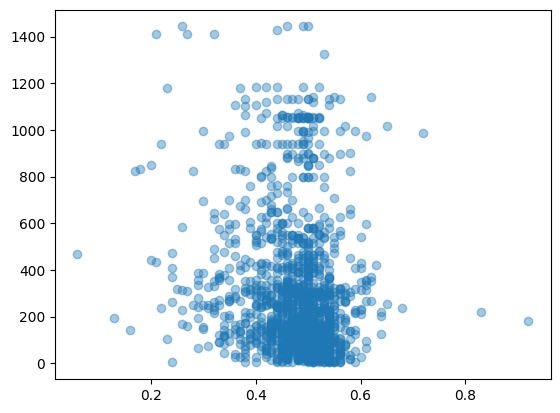

In [25]:
plt.scatter(df[['SecondServePointsWon']], df[['Ranking']], alpha = 0.4)
plt.show()

### Exploratory Analysis of Inputs vs Outcomes

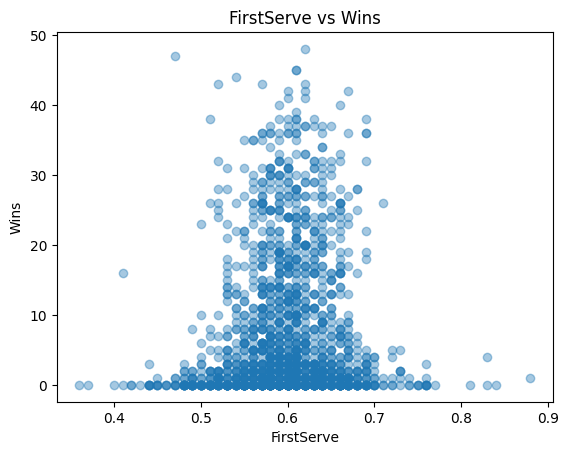

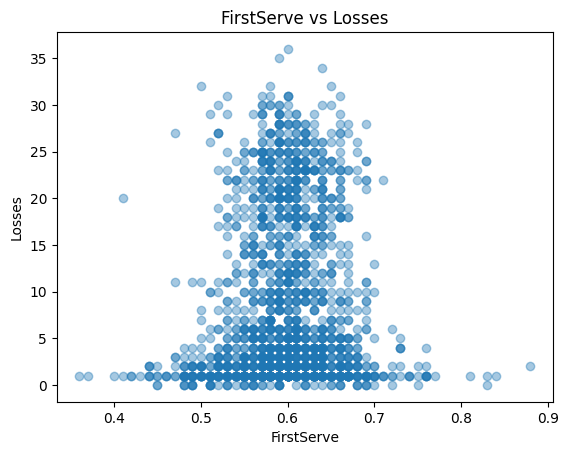

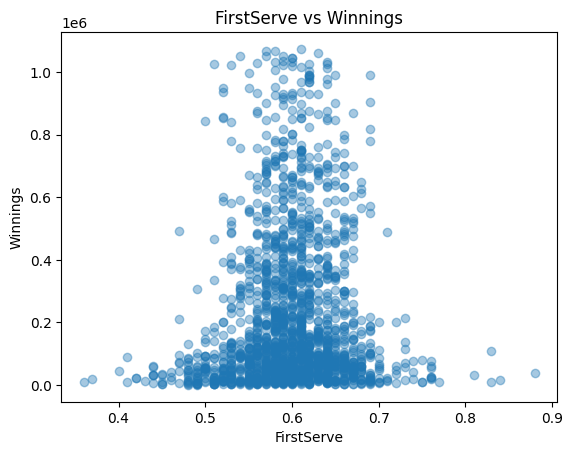

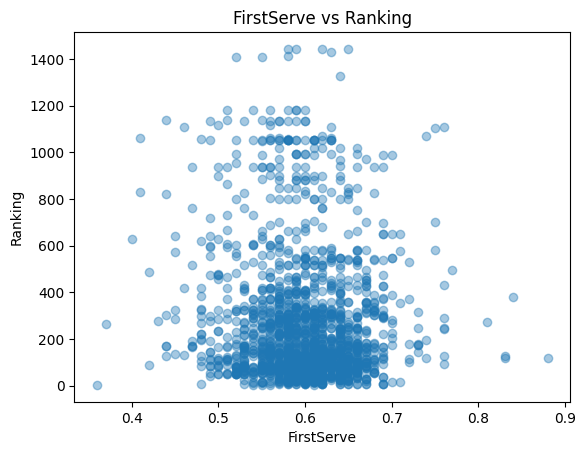

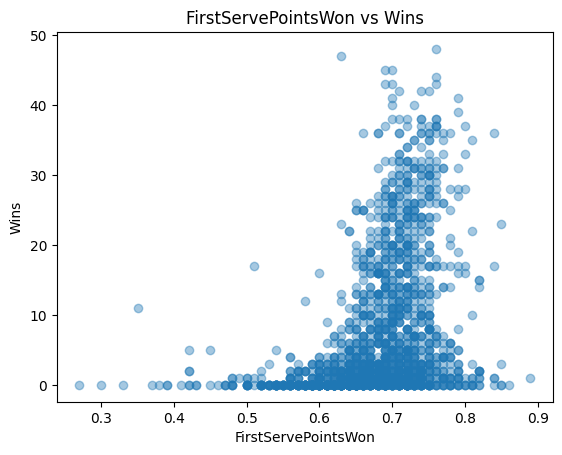

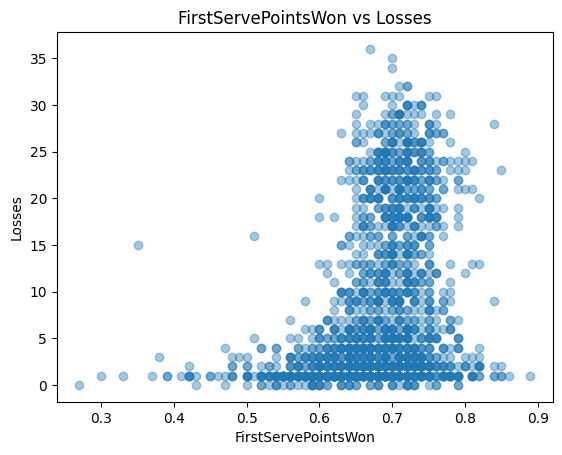

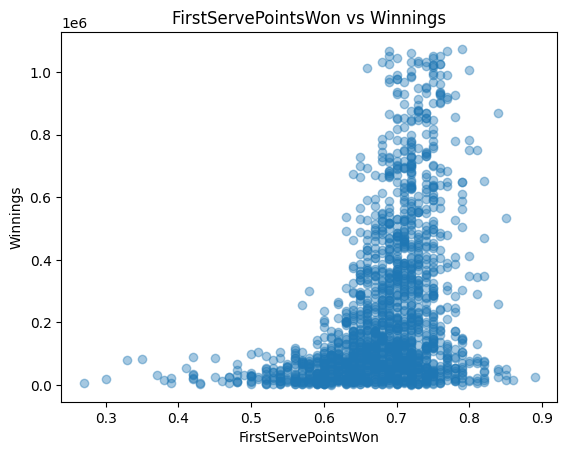

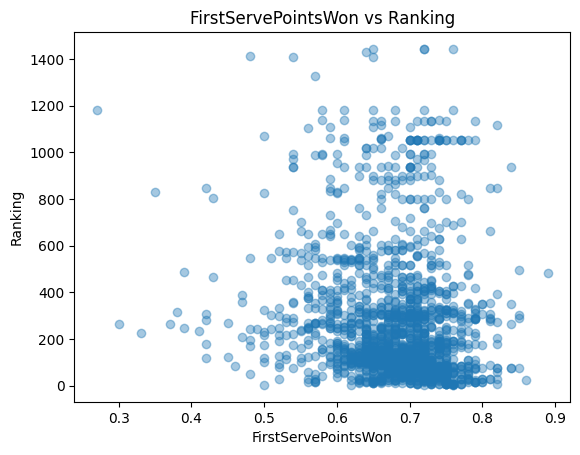

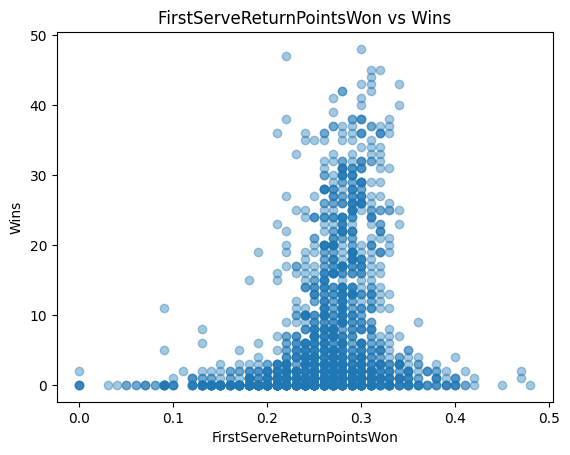

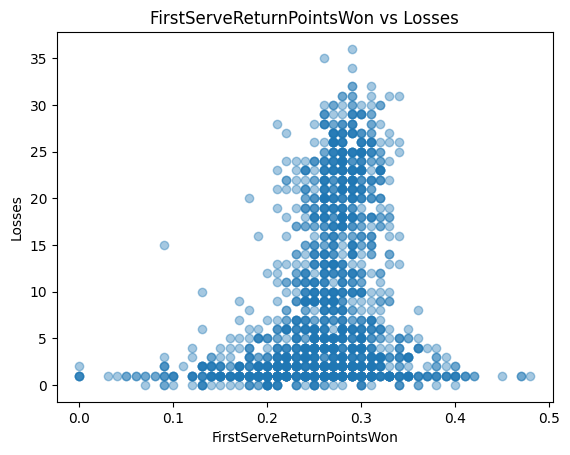

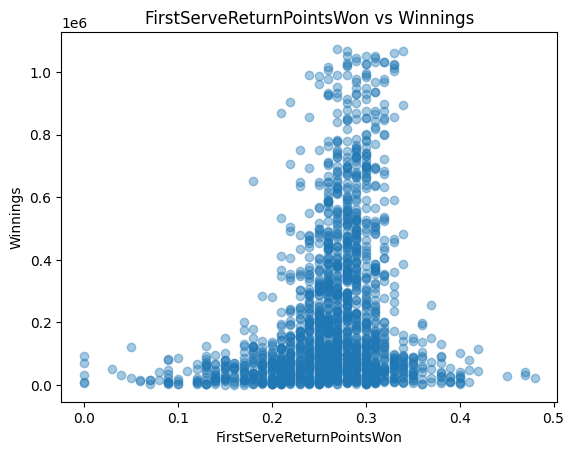

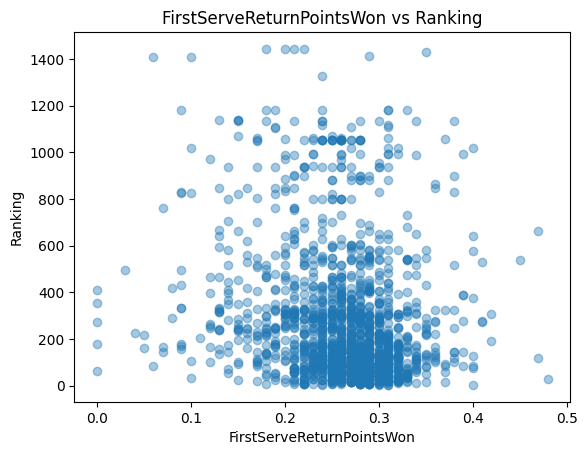

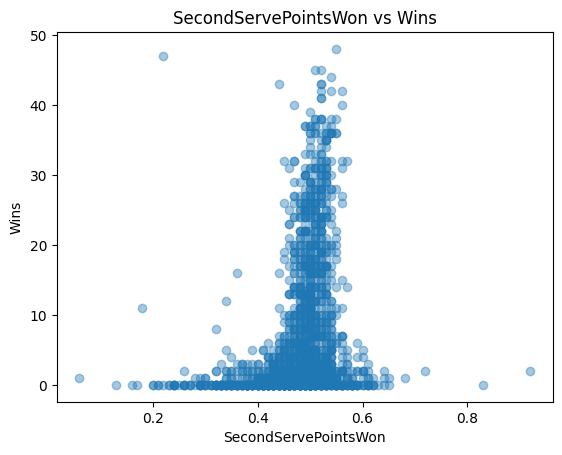

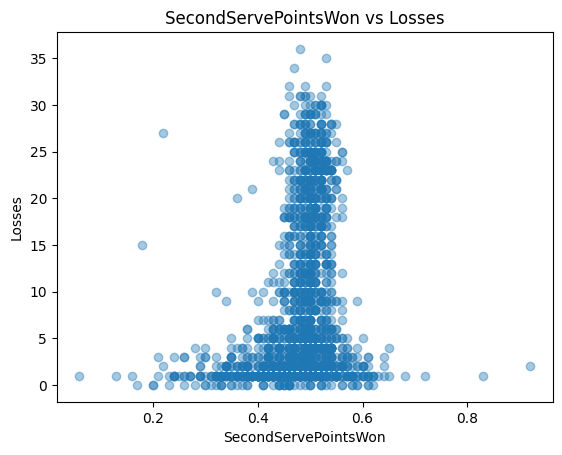

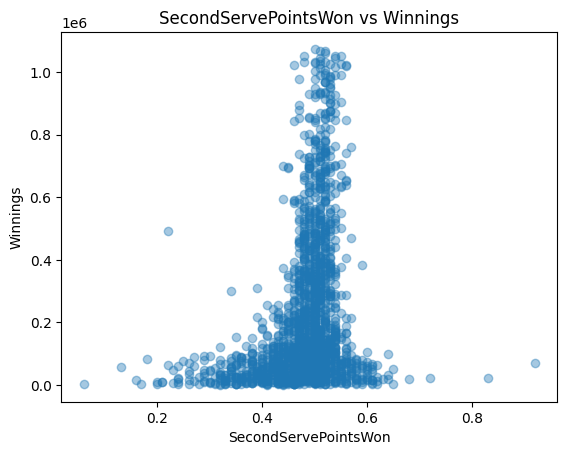

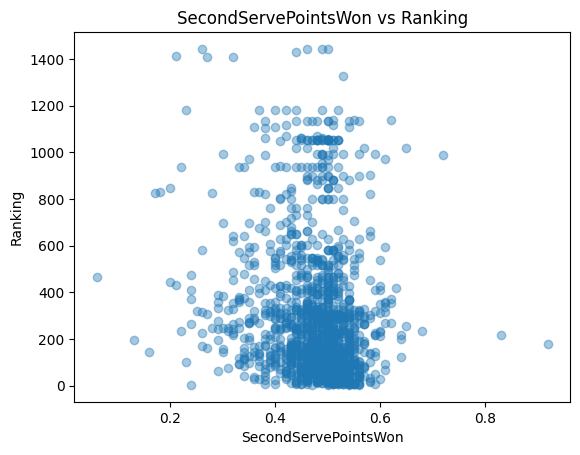

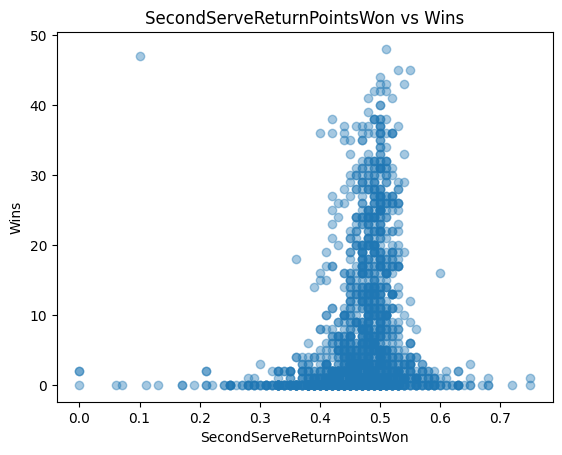

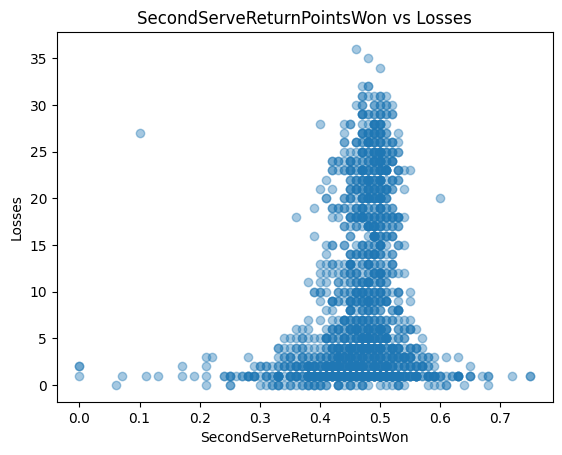

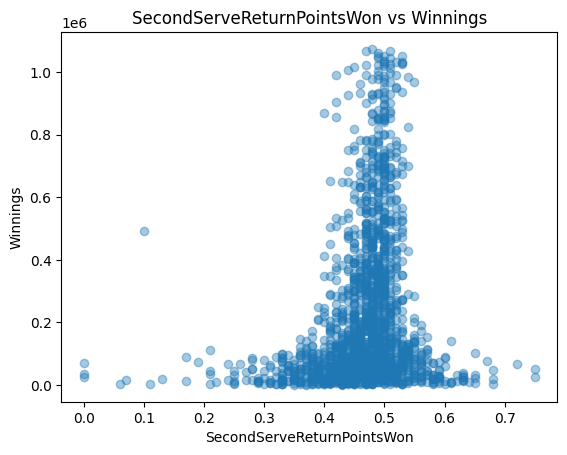

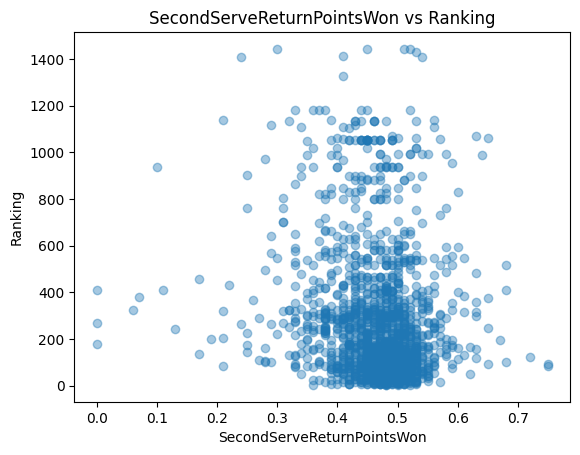

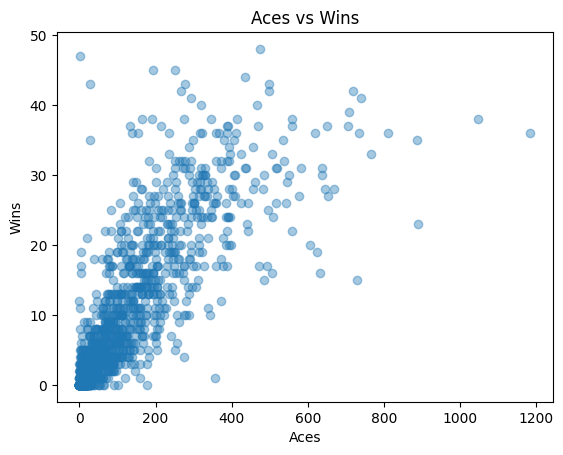

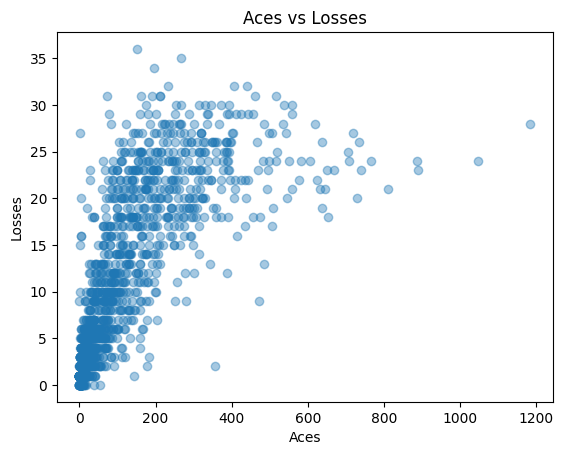

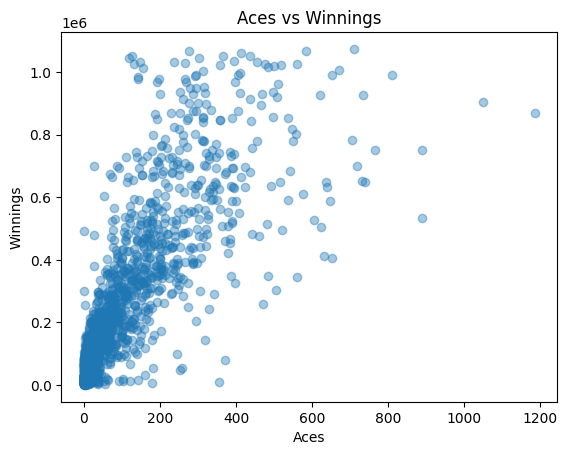

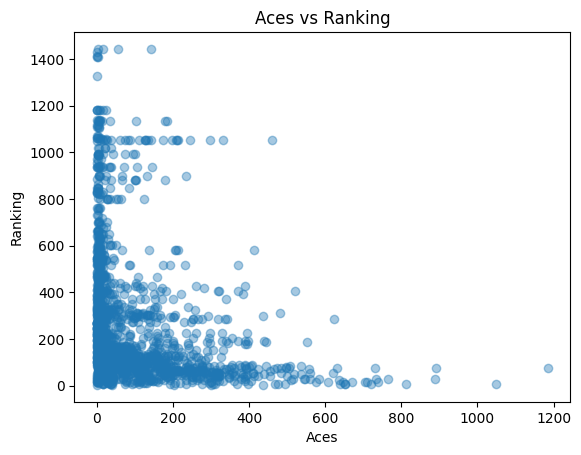

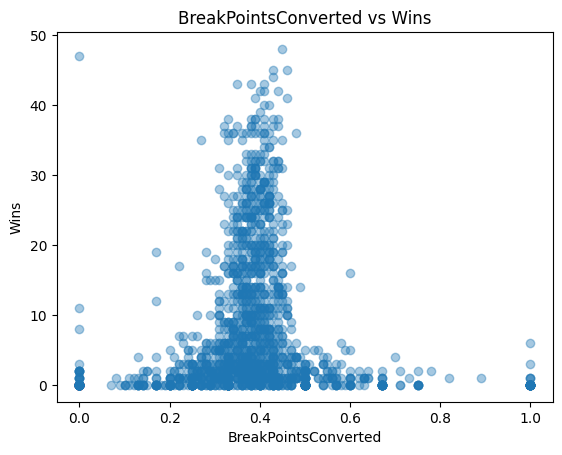

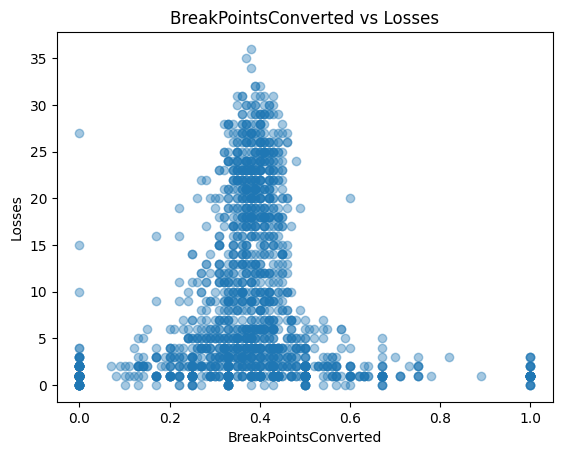

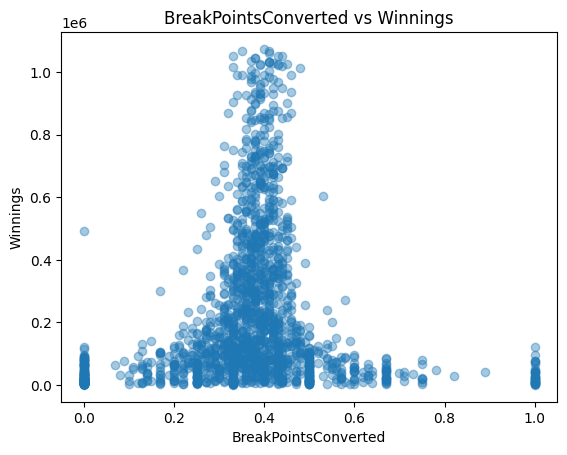

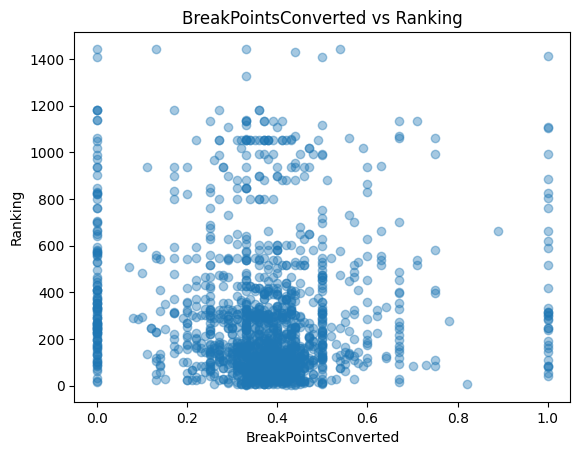

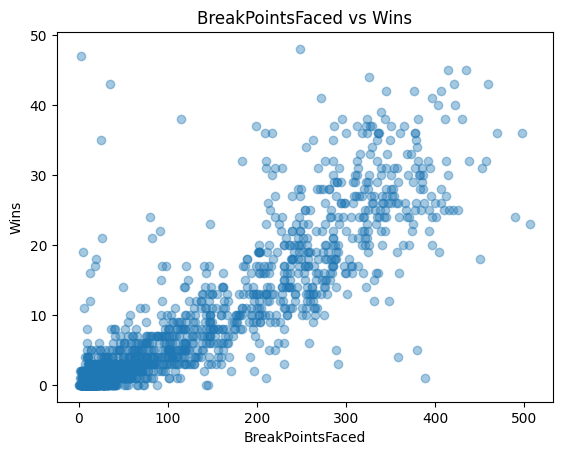

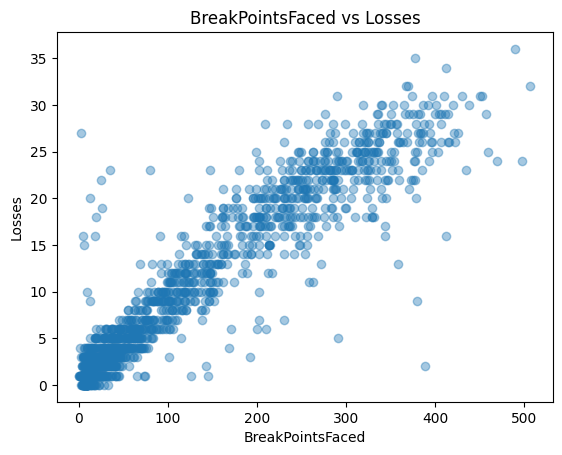

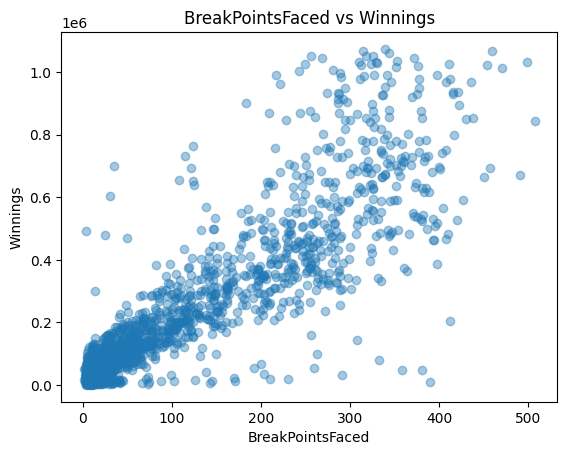

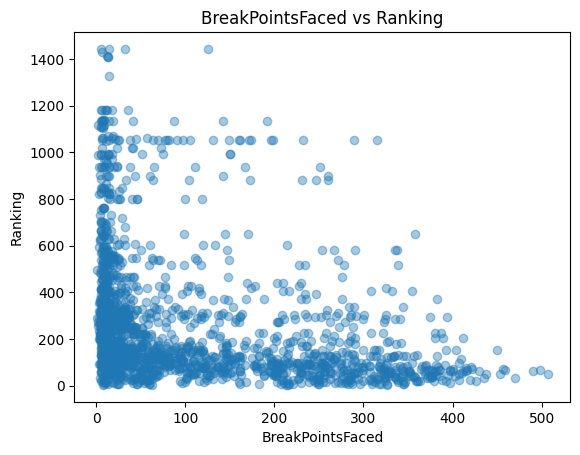

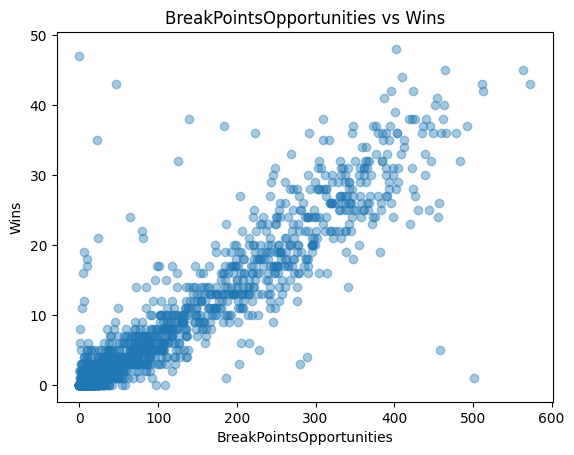

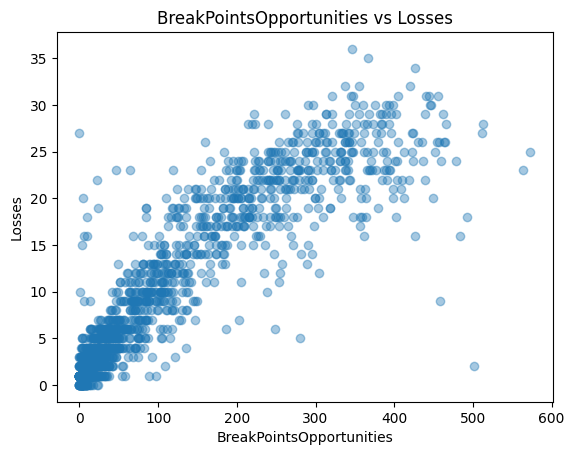

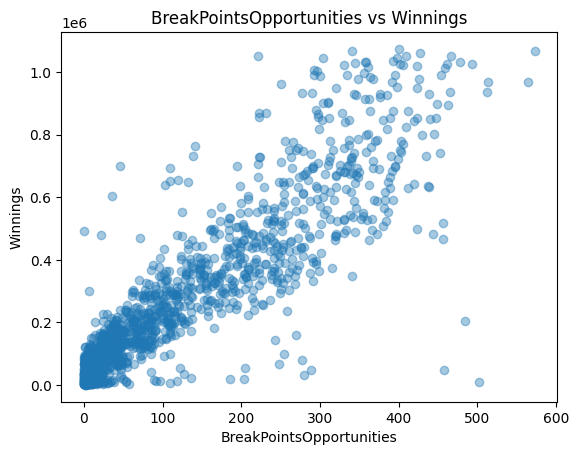

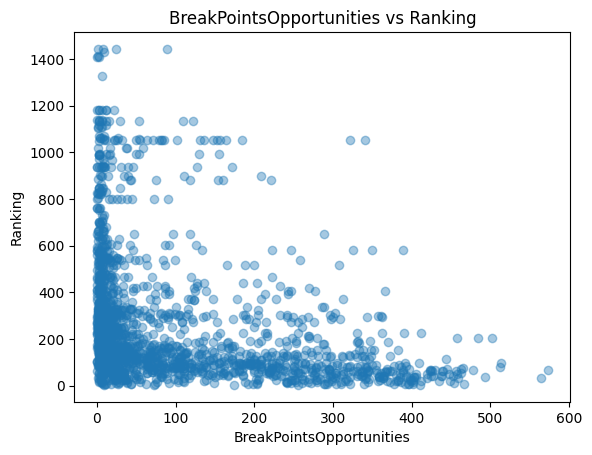

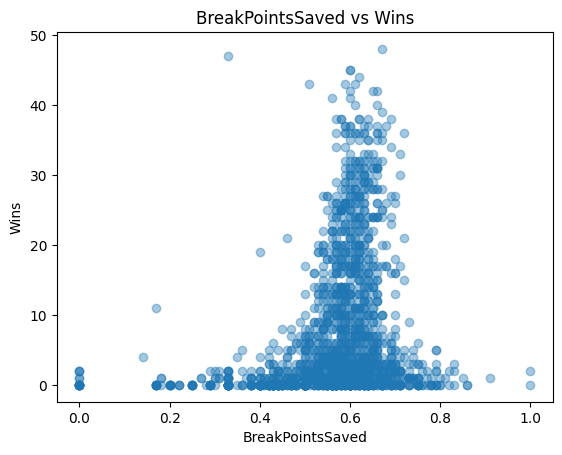

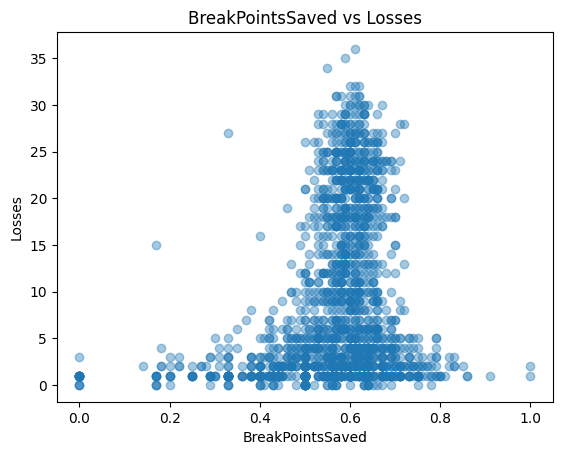

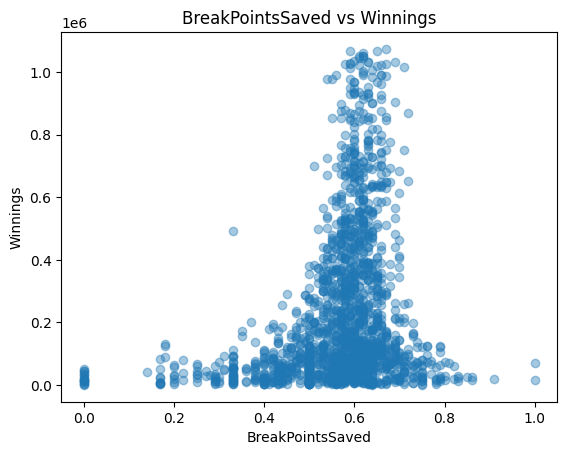

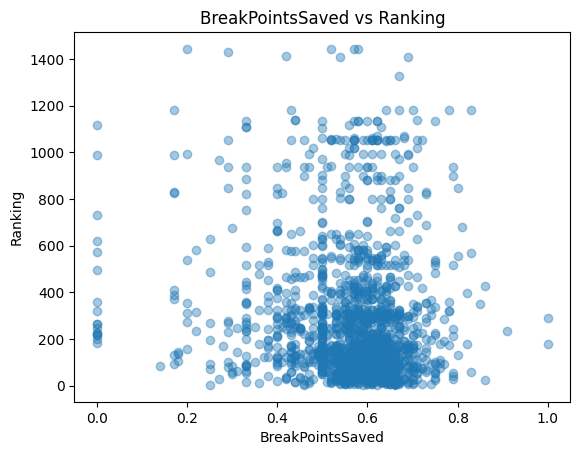

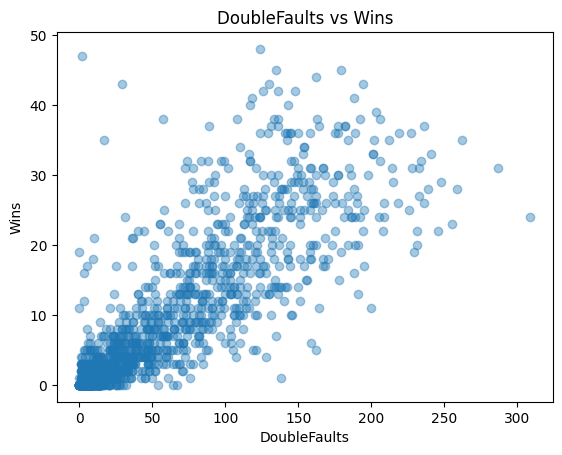

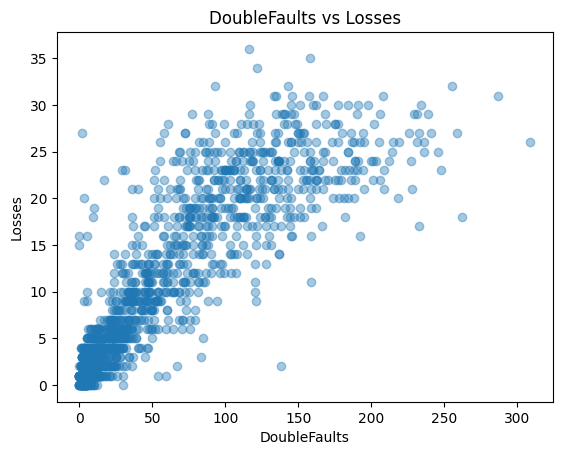

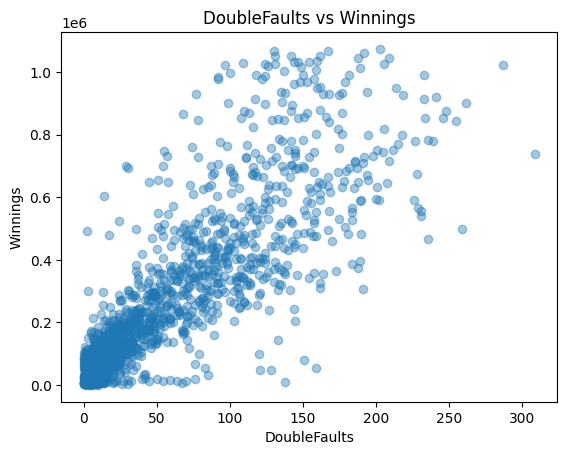

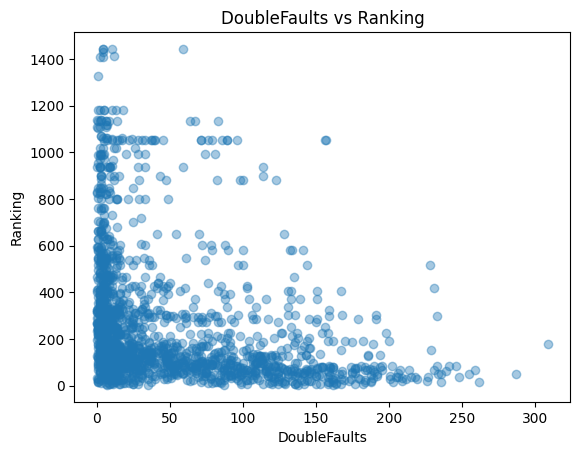

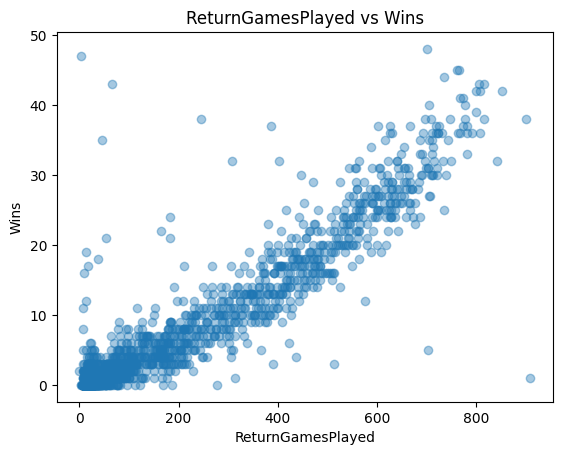

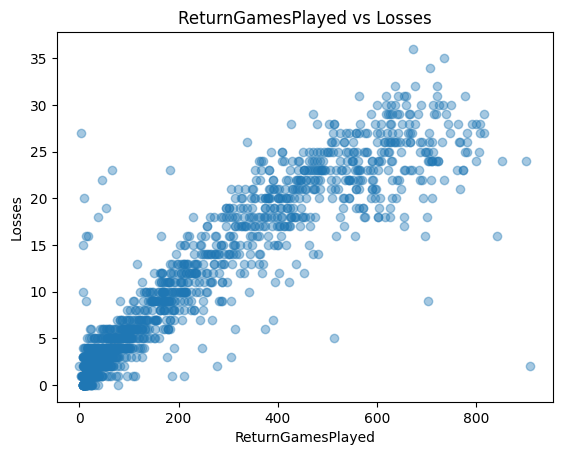

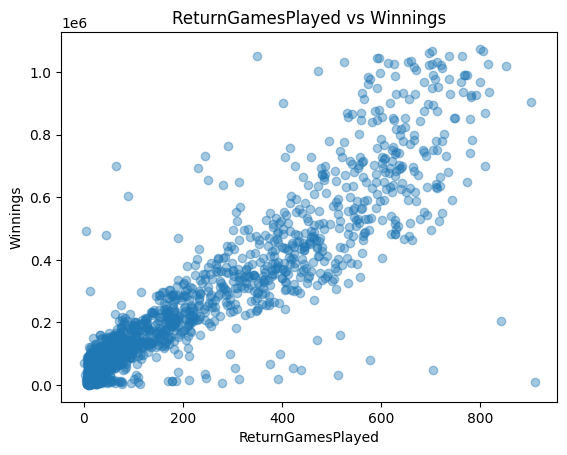

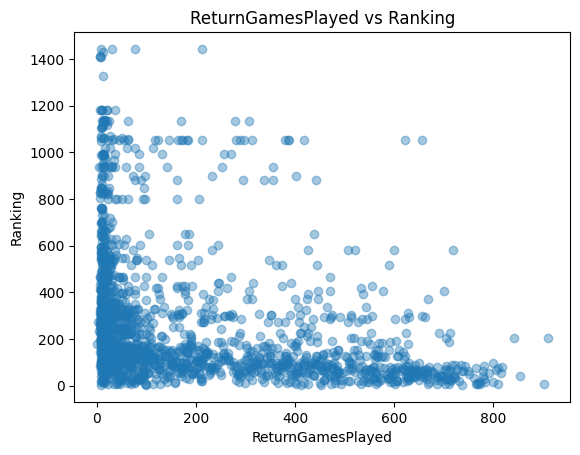

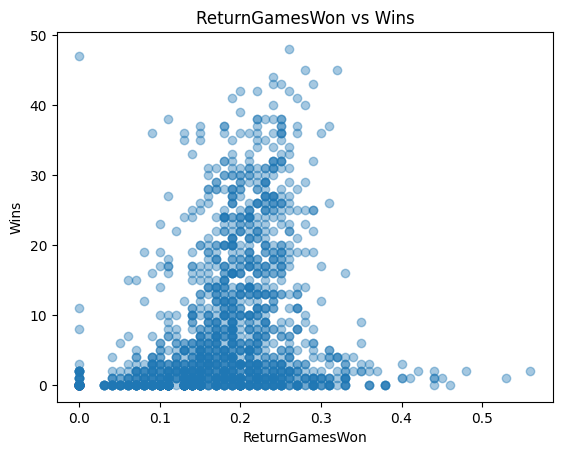

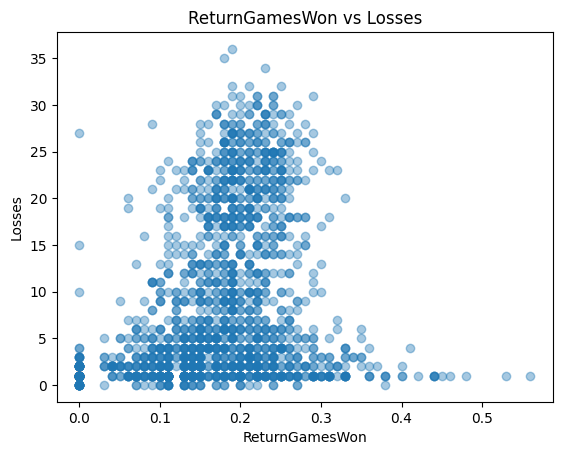

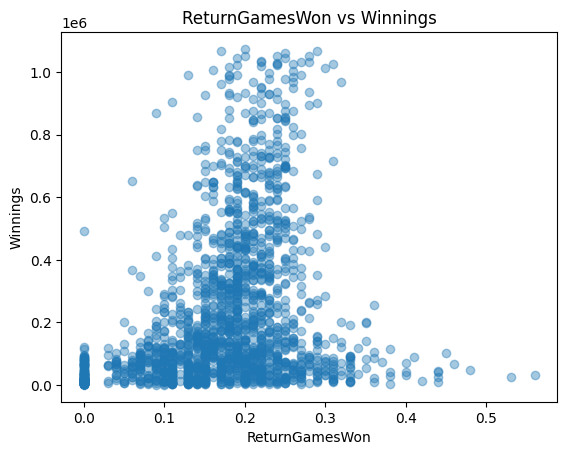

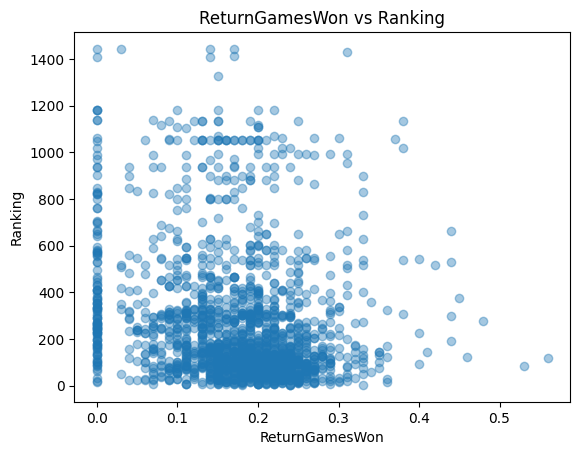

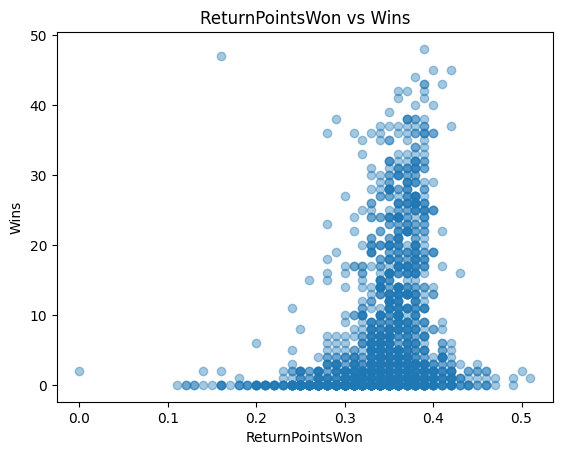

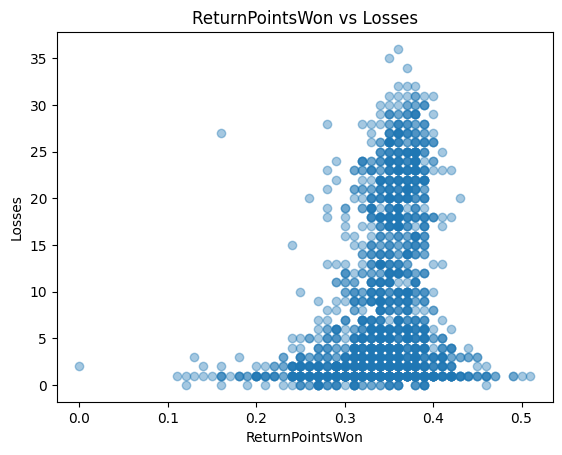

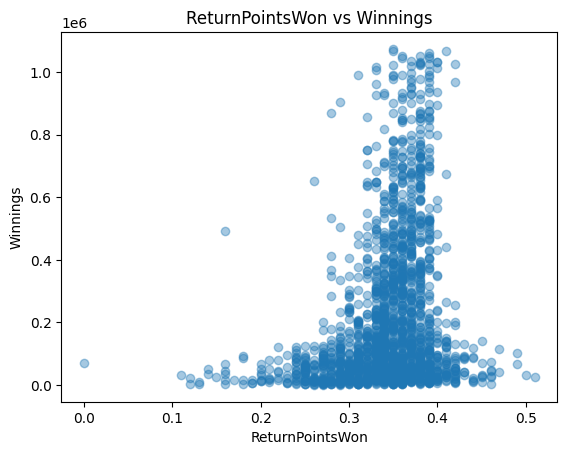

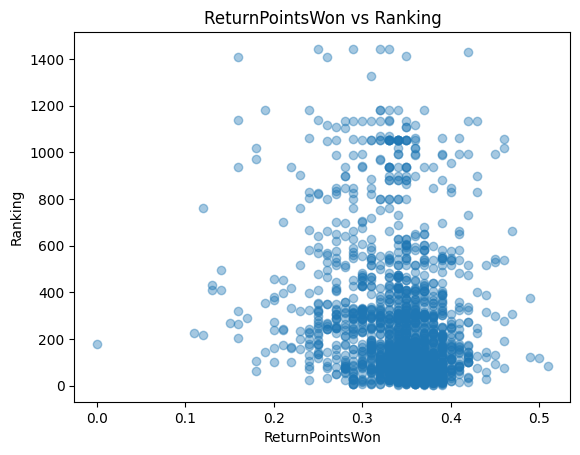

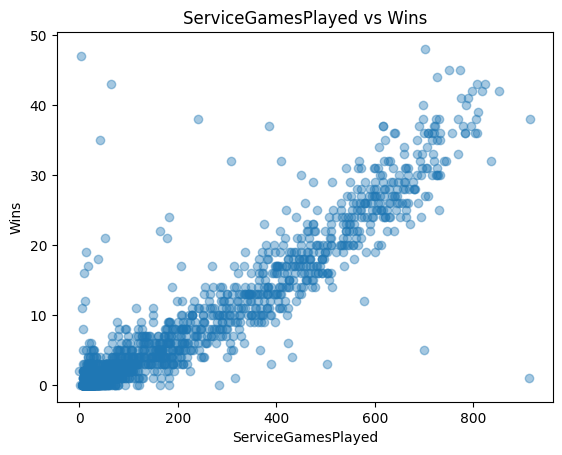

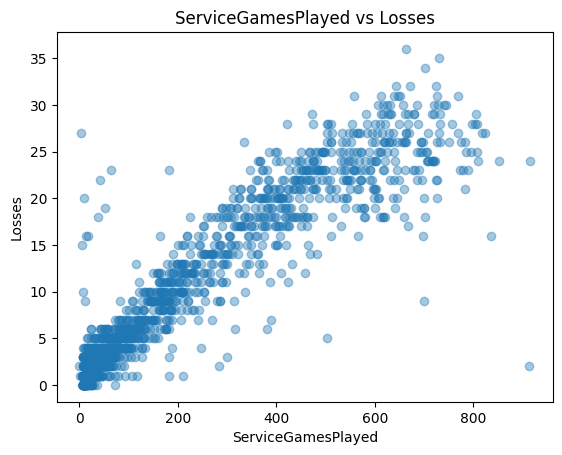

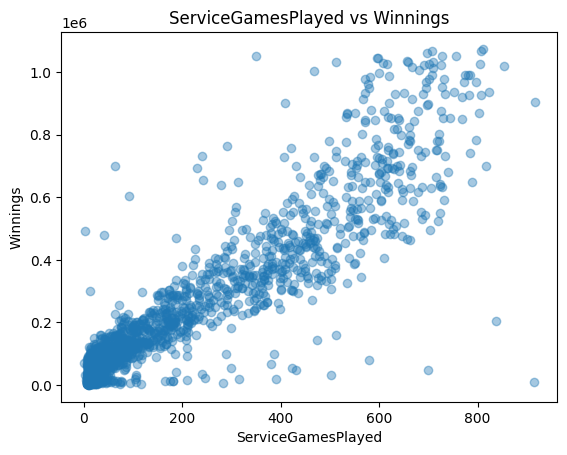

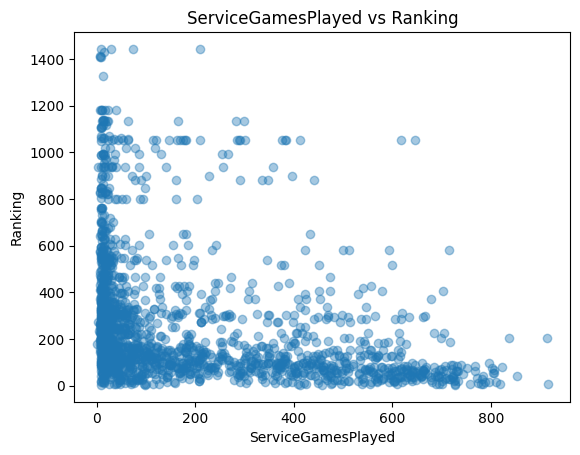

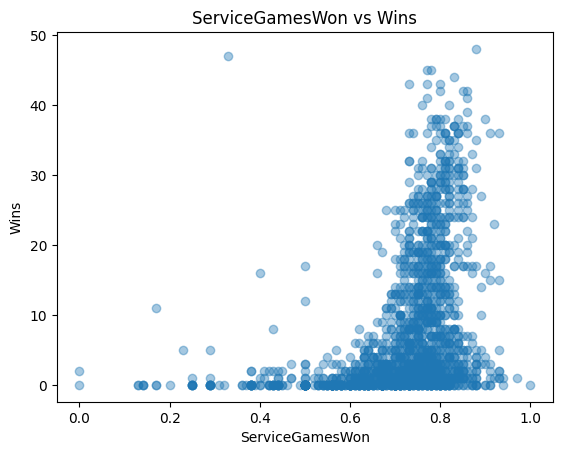

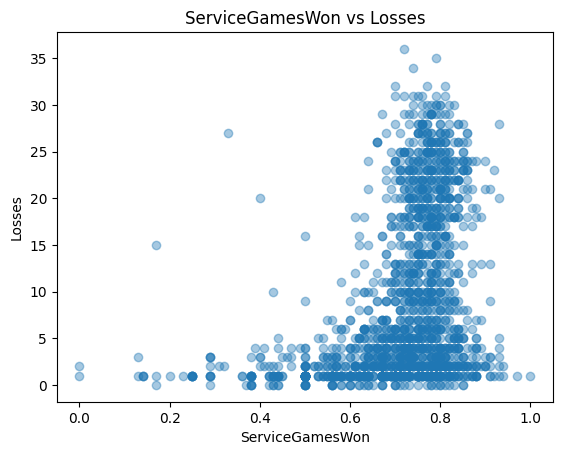

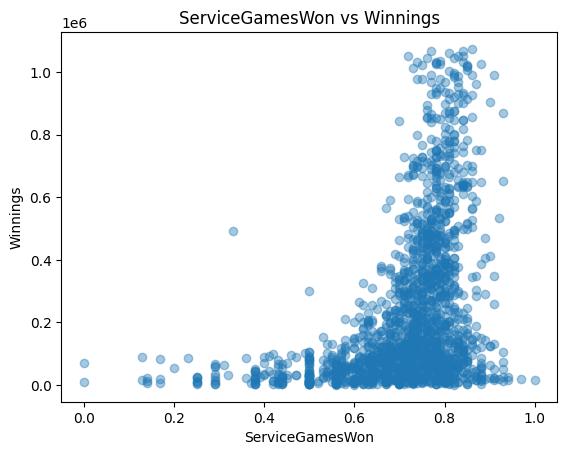

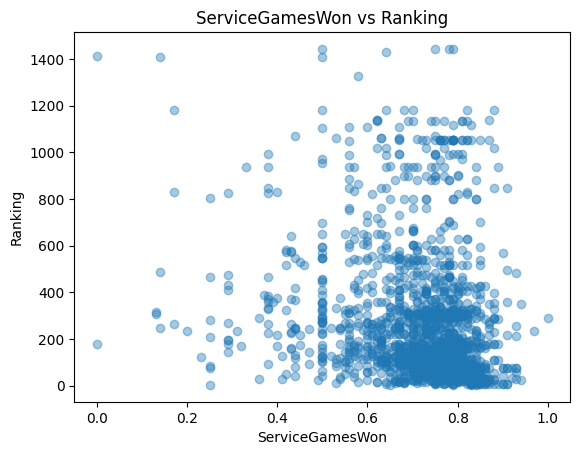

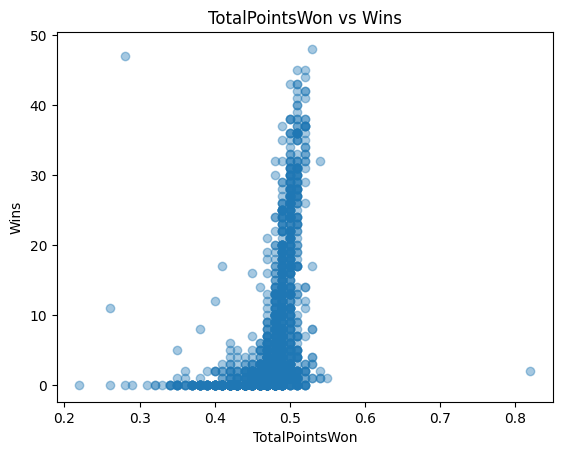

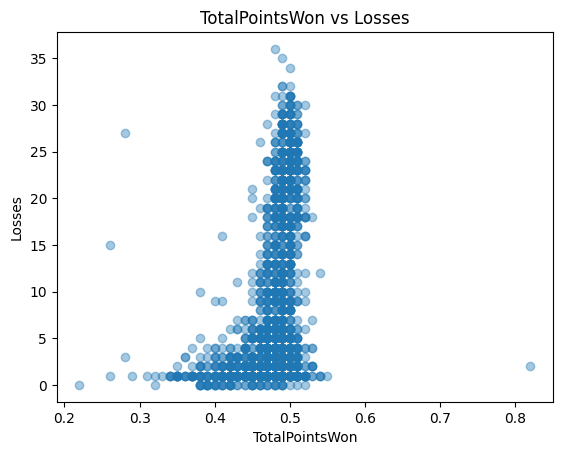

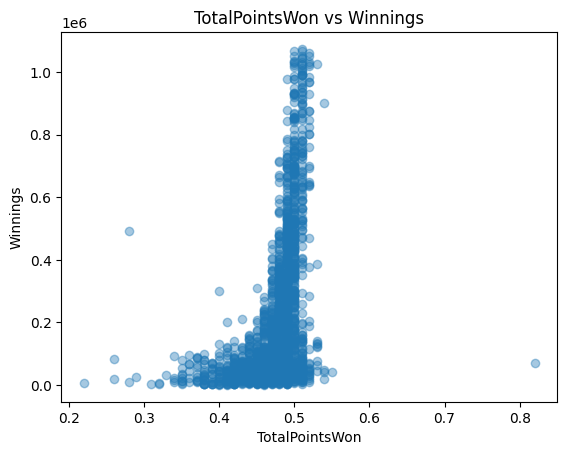

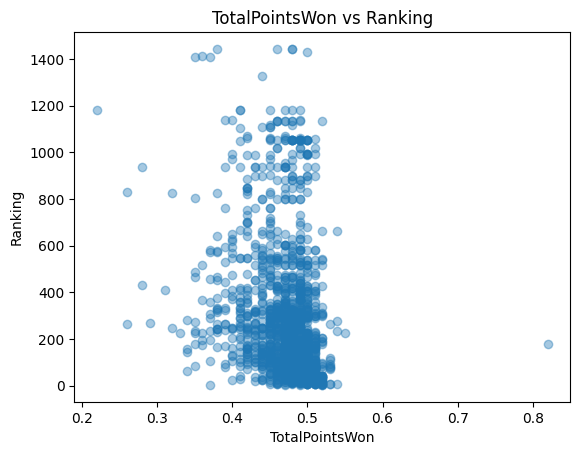

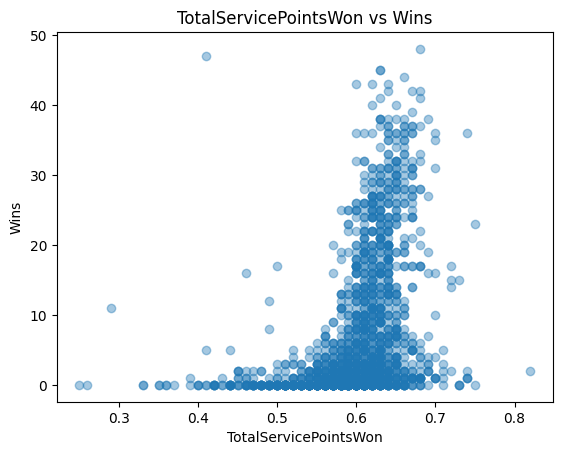

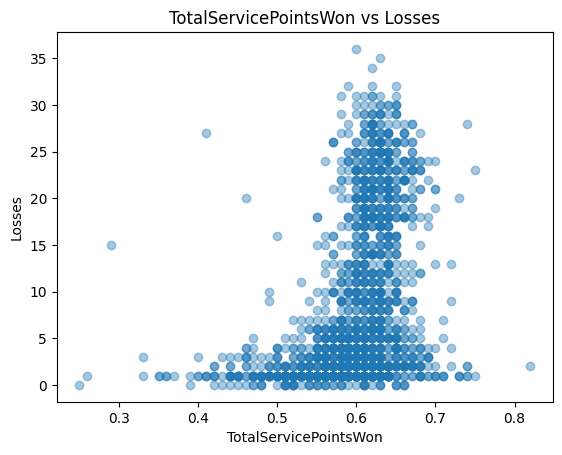

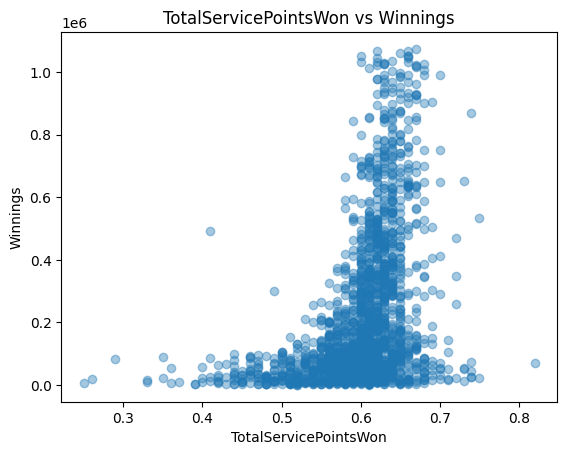

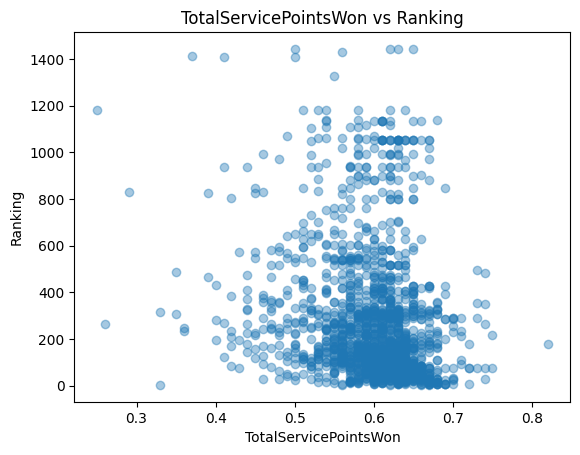

In [36]:
import matplotlib.pyplot as plt

# Convert columns to a list
columns = list(df.columns)

outcomes = columns[-4:]
input_columns = columns[2:-4]

def scatterplot(input_columns, outcomes, df=df):
    for col in input_columns:
        for outcome in outcomes:
            plt.scatter(df[col], df[outcome], alpha=0.4)
            plt.title(col + " vs " + outcome)
            plt.xlabel(col)
            plt.ylabel(outcome)
            plt.show()

scatterplot(input_columns, outcomes)


Aces vs (Wins, Losses, Winnings) has a positive correlation
BreakPointsFaced Vs (Wins, Losses, Winnings)
BreakPointsOpportunities vs (Wins, Losses, Winnings)
DoubleFaults vs (Wins,Losses, Winnings)
ReturnGamesPlayes vs (Wins, Losses, Winnings)
ServiceGamesPlayes vs (Wins, Losses, Winnings)

### Simple Linear Regression

#### Linear Regression on Aces Vs Wins

In [41]:
X_Aces = df['Aces']
X_Aces = X_Aces.values.reshape(-1,1)
# print(X_Aces)

y = df['Wins']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X_Aces, y, train_size = 0.8, test_size = 0.2, random_state = 6)

In [42]:
aces_linear = LinearRegression()

In [47]:
aces_linear.fit(x_train, y_train)

LinearRegression()

In [48]:
aces_linear.coef_, aces_linear.intercept_

(array([0.06162772]), 1.8223460808039613)

In [49]:
aces_linear.score(x_test, y_test)

0.6626421969769964

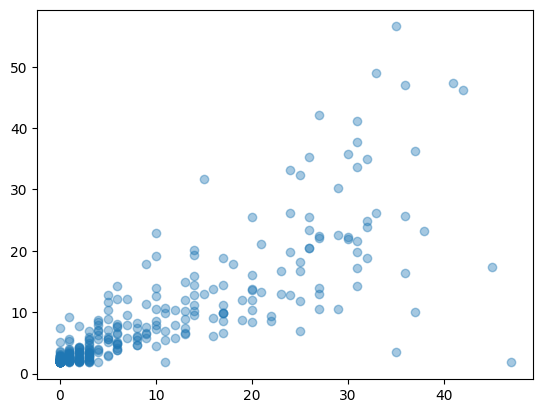

In [50]:
prediction = aces_linear.predict(x_test)
plt.scatter(y_test,prediction, alpha=0.4)
plt.show()

#### BreakPointsOpportunities vs Wins

In [55]:
X_BreakPointsOpportunities = df['BreakPointsOpportunities']
X_BreakPointsOpportunities = X_BreakPointsOpportunities.values.reshape(-1,1)
# print(X_Aces)

y = df['Winnings']

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X_BreakPointsOpportunities, y, train_size = 0.8, test_size = 0.2, random_state = 6)

In [57]:
BreakPointsOpportunities_linear = LinearRegression()

In [59]:
BreakPointsOpportunities_linear.fit(x_train, y_train)

LinearRegression()

In [60]:
BreakPointsOpportunities_linear.coef_, BreakPointsOpportunities_linear.intercept_

(array([1845.33857889]), 43366.8341231611)

In [61]:
BreakPointsOpportunities_linear.score(x_test, y_test)

0.8081205523550062

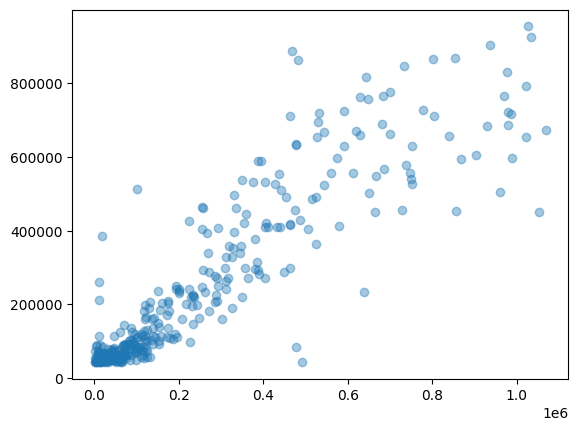

In [62]:
prediction = BreakPointsOpportunities_linear.predict(x_test)
plt.scatter(y_test, prediction, alpha = 0.4)
plt.show()

#### ReturnGamesPlayed vs Losses

In [63]:
X_ReturnGamesPlayed= df['ReturnGamesPlayed']
X_ReturnGamesPlayed = X_ReturnGamesPlayed.values.reshape(-1,1)

y = df['Losses']

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X_ReturnGamesPlayed, y, train_size = 0.8, test_size = 0.2, random_state = 6)

In [66]:
return_games_played_linear = LinearRegression()

In [67]:
return_games_played_linear.fit(x_train, y_train)

LinearRegression()

In [68]:
return_games_played_linear.coef_, return_games_played_linear.intercept_

(array([0.03808126]), 1.6771298446485092)

In [69]:
return_games_played_linear.score(x_test, y_test)

0.8752042558767359

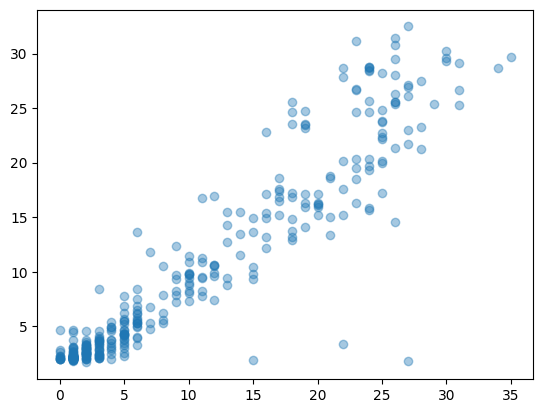

In [70]:
prediction = return_games_played_linear.predict(x_test)
plt.scatter(y_test, prediction, alpha = 0.4)
plt.show()

#### ServiceGamesPlayed Vs Wins

In [72]:
X_ServiceGamesPlayed = df['ServiceGamesPlayed']
X_ServiceGamesPlayed = X_ServiceGamesPlayed.values.reshape(-1,1)
# X_ServiceGamesPlayed
y = df['Wins']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(X_ServiceGamesPlayed, y, train_size = 0.8, test_size = 0.2, random_state = 6)

In [74]:
service_games_played = LinearRegression()

In [75]:
service_games_played.fit(x_train, y_train)

LinearRegression()

In [76]:
service_games_played.coef_, service_games_played.intercept_

(array([0.04252304]), -0.5609515615030221)

In [77]:
service_games_played.score(x_test, y_test)

0.8482433568190804

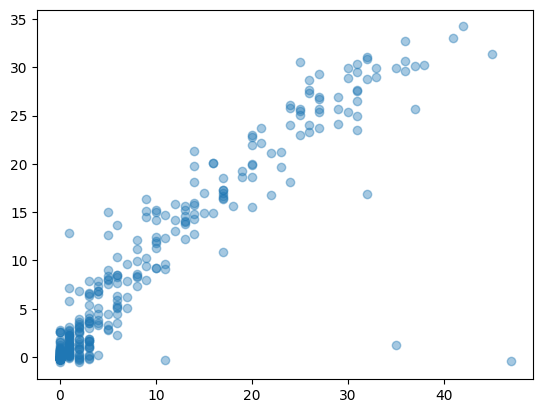

In [78]:
prediction = service_games_played.predict(x_test)
plt.scatter(y_test, prediction, alpha = 0.4)
plt.show()

### Multivariable Linear Regression with 2 Features

#### Aces and BreakPointsFaced Vs Winnings

In [82]:
X_aces_breakpointsfaced = df[['Aces', 'BreakPointsFaced']]
# X_aces_breakpointsfaced = X_aces_breakpointsfaced.values.reshape(-1,1)

y = df[['Winnings']]

In [83]:
x_train, x_test, y_train, y_test = train_test_split(X_aces_breakpointsfaced, y, train_size = 0.8, test_size = 0.2, random_state = 6)

In [85]:
aces_breakpointsfaced = LinearRegression()

In [86]:
aces_breakpointsfaced.fit(x_train, y_train)

LinearRegression()

In [87]:
aces_breakpointsfaced.coef_, aces_breakpointsfaced.intercept_

(array([[ 616.1181243 , 1311.94018991]]), array([26778.59469086]))

In [88]:
aces_breakpointsfaced.score(x_test, y_test)

0.7990145092808743

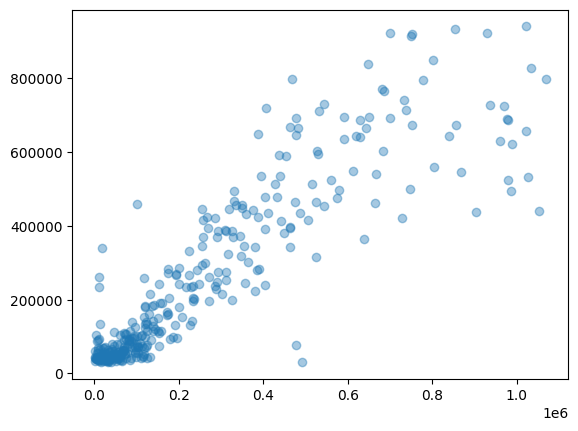

In [89]:
prediction = aces_breakpointsfaced.predict(x_test)
plt.scatter(y_test, prediction, alpha = 0.4)
plt.show()

#### Aces and BreakPointsOpportunities vs Winnings

In [91]:
X_aces_breakpointsopportunities = df[['Aces', 'BreakPointsOpportunities']]

y = df[['Winnings']]

In [92]:
x_train, x_test, y_train, y_test = train_test_split(X_aces_breakpointsopportunities, y, train_size = 0.8, test_size = 0.2, random_state = 6)

In [93]:
aces_breakpointsopportunities = LinearRegression()

In [94]:
aces_breakpointsopportunities.fit(x_train, y_train)

LinearRegression()

In [95]:
aces_breakpointsopportunities.coef_, aces_breakpointsopportunities.intercept_

(array([[ 471.6990364 , 1433.32496126]]), array([40067.10714279]))

In [96]:
aces_breakpointsopportunities.score(x_test, y_test)

0.8218888075656878

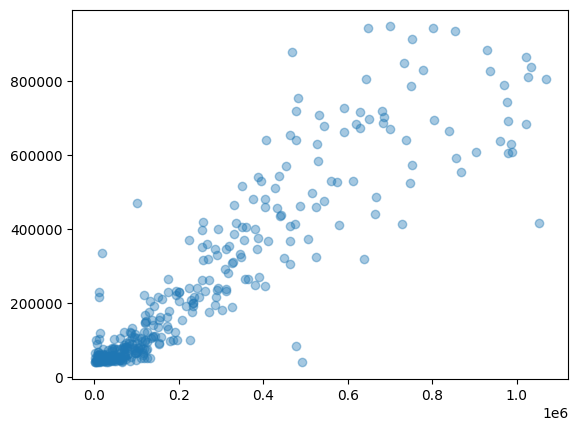

In [97]:
prediction = aces_breakpointsopportunities.predict(x_test)
plt.scatter(y_test, prediction, alpha = 0.4)
plt.show()

#### Aces and ServiceGamesPlayed Vs Winnings

In [98]:
X_aces_servicegamesplayed = df[['Aces', 'ServiceGamesPlayed']]

y = df[['Winnings']]

In [99]:
x_train, x_test, y_train, y_test = train_test_split(X_aces_servicegamesplayed, y, train_size = 0.8, test_size = 0.2, random_state = 6)

In [100]:
aces_servicegamesplayed = LinearRegression()

In [101]:
aces_servicegamesplayed.fit(x_train, y_train)

LinearRegression()

In [102]:
aces_servicegamesplayed.coef_, aces_servicegamesplayed.intercept_

(array([[ 97.93517889, 988.4212999 ]]), array([28573.12678827]))

In [104]:
aces_servicegamesplayed.score(x_test, y_test)

0.8261340336764728

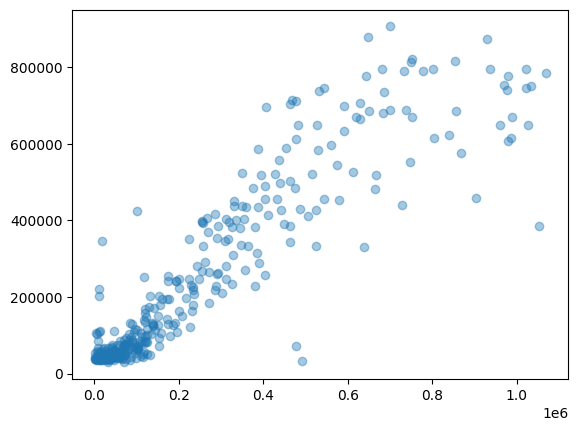

In [105]:
prediction = aces_servicegamesplayed.predict(x_test)
plt.scatter(y_test, prediction, alpha = 0.4)
plt.show()

#### Aces and DoubleFaults vs Winnings

In [106]:
X_aces_doublefaults = df[['Aces', 'DoubleFaults']]

y = df[['Winnings']]

In [107]:
x_train, x_test, y_train, y_test = train_test_split(X_aces_doublefaults, y, train_size = 0.8, test_size = 0.2, random_state = 6)

In [108]:
aces_doublefaults = LinearRegression()

In [109]:
aces_doublefaults.fit(x_train, y_train)

LinearRegression()

In [111]:
aces_doublefaults.coef_, aces_doublefaults.intercept_

(array([[ 580.3234193 , 2689.01004956]]), array([44487.16267033]))

In [112]:
aces_doublefaults.score(x_test, y_test)

0.710079502126786

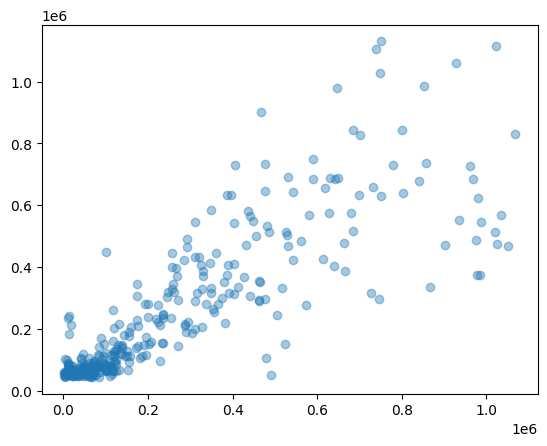

In [113]:
prediction = aces_doublefaults.predict(x_test)
plt.scatter(y_test, prediction, alpha = 0.4)
plt.show()

#### Aces and ReturnGamesPlayed Vs Winnings

In [114]:
X_aces_returngamesplayed = df[['Aces', 'ReturnGamesPlayed']]

y = df[['Winnings']]

In [115]:
x_train, x_test, y_train, y_test = train_test_split(X_aces_returngamesplayed, y, train_size = 0.8, test_size = 0.2, random_state = 6)

In [116]:
aces_returngamesplayed = LinearRegression()

In [118]:
aces_returngamesplayed.fit(x_train,y_train)

LinearRegression()

In [120]:
aces_returngamesplayed.coef_, aces_returngamesplayed.intercept_

(array([[114.9473338 , 978.45681321]]), array([28316.76859331]))

In [121]:
aces_returngamesplayed.score(x_test,y_test)

0.826416427260348

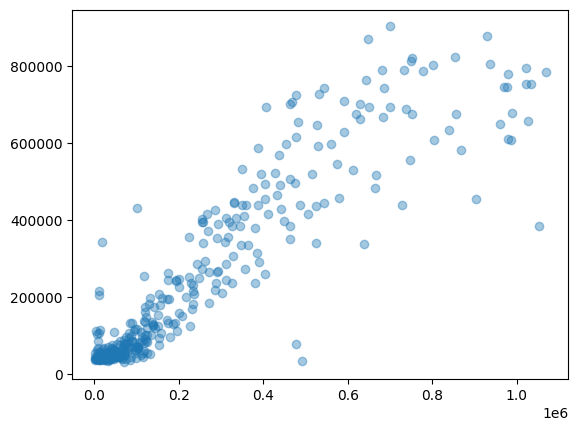

In [122]:
prediction = aces_returngamesplayed.predict(x_test)
plt.scatter(y_test, prediction, alpha = 0.4)
plt.show()

### Multivariabel Linear Regression Model with 3 or More Features

In [124]:
X = df[['Aces', 'ReturnGamesPlayed', 'ServiceGamesPlayed', 'BreakPointsOpportunities']]

y = df[['Winnings']]

In [126]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 6)

In [128]:
three_or_more_linear = LinearRegression()
three_or_more_linear.fit(x_train, y_train)

LinearRegression()

In [130]:
three_or_more_linear.coef_, three_or_more_linear.intercept_

(array([[  245.60730127, -1384.8992469 ,  1892.36890011,   739.43227307]]),
 array([33988.70724514]))

In [131]:
three_or_more_linear.score(x_test,y_test)

0.8272340460294392

In [133]:
prediction = three_or_more_linear.predict(x_test)

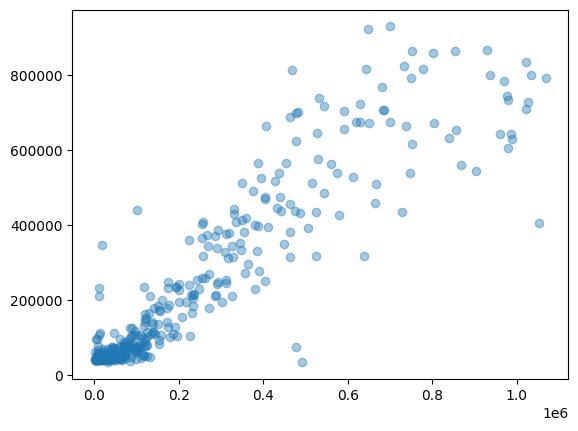

In [134]:
plt.scatter(y_test, prediction, alpha = 0.4)
plt.show()